### Creating Fig 3

In [1]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
import statistics
import numpy
import seaborn as sns
import numpy as np
import os
os.chdir('../')

# Reset default params
sns.set()

import matplotlib.pyplot as plt
# plt.style.use('seaborn-deep')




In [2]:
experiment='renewableenergy'
if experiment=='demantia':
    df_expert=pd.read_csv("input_dementia/labeled_data_idea.csv")
    df= pd.read_csv('input/Batch_4176044_batch_results.csv')
elif experiment=='renewableenergy': 
    df_expert=pd.read_csv("input_renewableenergy/labeled_data_idea.csv")
    df= pd.read_csv('input/Batch_renewableenergy_crowd.csv')
elif experiment=='fanancial':
    df_expert=pd.read_csv("input_fanancial_emp/labeled_data_idea.csv")
    df= pd.read_csv('input/Batch_fanancialempowerment_crowd.csv')

In [3]:
df_expert.head(2)

,Id,title,idea,rating,labels,labels_viability,labels_feasibility,labels_desirability,final_feedback
0,302U8RURJZDWEP7Y1R2Q92RT4Q5VN2,302U8RURJZDWEP7Y1R2Q92RT4Q5VN2,The REISAP (Renewable Energy Information Syst...,0,3,3,3,4,0
1,304QEQWKZPWY396UZ9EE3Y1804Y0OV,304QEQWKZPWY396UZ9EE3Y1804Y0OV,Kyrgyzstan has a considerable rural poor popu...,0,4,4,3,5,0


In [4]:
df.head(2)

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Input.variable_name,Answer.Desirable,Answer.clarityreason,Answer.desirabilityreason,Answer.feasibilereason,Answer.feasible,Answer.overall,Answer.viability,Approve,Reject
0,30UZJB2POHO8CRZ9DH0YWQZOMLD35O,3NN44GVSBHALYSD581P8LC82KIEFGM,Rating ideas based on some criteria,In this survey we present a few ideas from a g...,"survey, rating",$1.00,Fri Oct 30 09:31:25 PDT 2020,2,BatchId:4235794;OriginalHitTemplateId:928390912;,3600,...,<h2>Flexergy: Resilient- Adaptable and Thermod...,3,More concrete details would have to be offered.,Increasing energy efficiency is desirable but ...,This seems like quite a complex idea.,2,3,3,NaN,NaN
1,30UZJB2POHO8CRZ9DH0YWQZOMLD35O,3NN44GVSBHALYSD581P8LC82KIEFGM,Rating ideas based on some criteria,In this survey we present a few ideas from a g...,"survey, rating",$1.00,Fri Oct 30 09:31:25 PDT 2020,2,BatchId:4235794;OriginalHitTemplateId:928390912;,3600,...,<h2>Flexergy: Resilient- Adaptable and Thermod...,3,I think if it gets the right support it can be...,It seems like something positive,It can probably be done with the right support.,3,3,4,NaN,NaN


In [5]:
df1=df.groupby("HITId").agg({"HITId":"first","Answer.Desirable":"first", "Answer.feasible":"first", "Answer.overall":"first","Answer.viability":"first","Input.variable_name":"first"})
list_desirability=[]
list_feasibility=[]
list_viability=[]
list_overall=[]

list_desirability_std=[]
list_feasibility_std=[]
list_viability_std=[]
list_overall_std=[]
length_ideas=[]
for index, row in df1.iterrows():
    temp = df_expert[df_expert['Id'] == row['HITId']]['labels_desirability'].values


    if temp != None:
        list_desirability.append(row["Answer.Desirable"])
        list_feasibility.append(row["Answer.feasible"])
        list_viability.append(row["Answer.viability"])
        list_overall.append(row["Answer.overall"])

df2=df.groupby("HITId").agg({"HITId":"last","Answer.Desirable":"last", "Answer.feasible":"last", "Answer.overall":"last","Answer.viability":"last","Input.variable_name":"last"})
list_desirability_2=[]
list_feasibility_2=[]
list_viability_2=[]
list_overall_2=[]

for index, row in df2.iterrows():
    temp = df_expert[df_expert['Id'] == row['HITId']]['labels_desirability'].values

    if temp != None:

        list_desirability_2.append(row["Answer.Desirable"])
        list_feasibility_2.append(row["Answer.feasible"])
        list_viability_2.append(row["Answer.viability"])
        list_overall_2.append(row["Answer.overall"])


df3=df.groupby("HITId").agg({"HITId":"last","Answer.Desirable":"mean", "Answer.feasible":"mean", "Answer.overall":"mean","Answer.viability":"mean","Input.variable_name":"last"})
list_desirability_3=[]
list_feasibility_3=[]
list_viability_3=[]
list_overall_3=[]

list_desirability_expert=[]
list_feasibility_expert=[]
list_viability_expert=[]
list_overall_expert=[]
list_ids=[]
for index, row in df3.iterrows():
    temp=df_expert[df_expert['Id'] == row['HITId']]['labels_desirability'].values

    if temp!=None:


        list_desirability_expert.append(temp[0])
        list_ids.append(row['HITId'])
        temp = df_expert[df_expert['Id'] == row['HITId']]['labels_feasibility'].values
        list_feasibility_expert.append(temp[0])
        temp = df_expert[df_expert['Id'] == row['HITId']]['labels_viability'].values
        list_viability_expert.append(temp[0])
        temp = df_expert[df_expert['Id'] == row['HITId']]['labels'].values
        list_overall_expert.append(temp[0])
        list_desirability_3.append(row["Answer.Desirable"])
        list_feasibility_3.append(row["Answer.feasible"])
        list_viability_3.append(row["Answer.viability"])
        list_overall_3.append(row["Answer.overall"])





<ipython-input-5-80878c0bb502>:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if temp != None:
<ipython-input-5-80878c0bb502>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if temp != None:
<ipython-input-5-80878c0bb502>:53: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if temp!=None:


In [6]:
df3.head(2)

,HITId,Answer.Desirable,Answer.feasible,Answer.overall,Answer.viability,Input.variable_name
HITId,,,,,,
302U8RURJZDWEP7Y1R2Q92RT4Q5VN2,302U8RURJZDWEP7Y1R2Q92RT4Q5VN2,3.0,2.5,1.5,2.5,<h2>REISAP (Renewable Energy Information Syste...
304QEQWKZPWY396UZ9EE3Y1804Y0OV,304QEQWKZPWY396UZ9EE3Y1804Y0OV,3.5,3.5,3.5,3.5,<h2>Poo Power: using behaviour change- solidar...


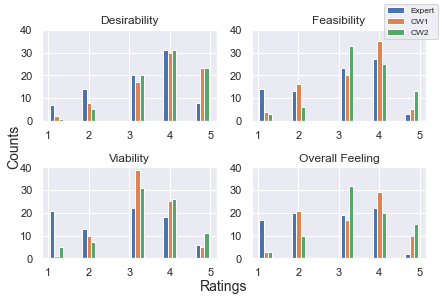

In [7]:
fig = plt.figure()
ax = fig.subplots(nrows=2, ncols=2)

#custom_ylim = (0,60)

# Setting the values for all axes.

plt.subplot(2, 2, 1)
y_count=[]
for ii in range(0, len(list_feasibility_expert)):
    y_count.append(ii)

plt.hist([list_desirability_expert,list_desirability, list_desirability_2],  label=['Expert', 'CW1', 'CW2'])
plt.ylim(0, 40)

plt.title('Desirability')

plt.subplot(2, 2, 2)
plt.hist([list_feasibility_expert,list_feasibility, list_feasibility_2],  label=['Expert', 'CW1', 'CW2'])
plt.ylim(0, 40)

plt.title('Feasibility')

plt.subplot(2, 2, 3)
plt.hist([list_viability_expert,list_viability, list_viability_2],  label=['Expert', 'CW1', 'CW2'])
plt.ylim(0, 40)

plt.title('Viability')

plt.subplot(2, 2, 4)
plt.hist([list_overall_expert,list_overall, list_overall_2],  label=['Expert', 'CW1', 'CW2'])
plt.ylim(0, 40)

plt.title('Overall Feeling')

lines, labels = fig.axes[-1].get_legend_handles_labels()

fig.legend(lines, labels, loc='upper right',fontsize = 'x-small')
fig.text(0.5, 0, 'Ratings', ha='center',fontsize=14)
fig.text(0, 0.5, 'Counts', va='center', rotation='vertical',fontsize=14)
fig.tight_layout()

